# Processing profiles for the lake drainage

In [2]:
# Load libraries
import sys
import sys
sys.path.append("../../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

import xarray as xr
import importlib
import pandas as pd
import math
from datetime import datetime, timedelta, date
from scipy.stats import linregress
from helpers import *

importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    17:59:53 	 ApRESDefs.py @function _setup_logging line 615 - Stream logging level set to DEBUG
DEBUG    17:59:53 	 ApRESDefs.py @function _setup_logging line 616 - Add console handler to logger
DEBUG    17:59:53 	 ApRESDefs.py @function _setup_logging line 629 - File logging level set to DEBUG


In [3]:
# Load data
ds_11 = reload("A101")
ds_11 = ds_11.isel(time=range(20,len(ds_11.time))) # trim first few bursts, which were tests

ds_13 = reload("A103_fixed")
ds_13 = ds_13.isel(time=range(60,len(ds_13.time))) # trim first few bursts, which were tests

ds_14 = reload("A104")
ds_14 = ds_14.isel(time=range(50,len(ds_14.time))) # trim first few bursts, which were tests



In [4]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:36925")
client

<Client: 'tcp://127.0.0.1:36925' processes=4 threads=16, memory=125.81 GiB>

## A11

Let's load in the GPS data

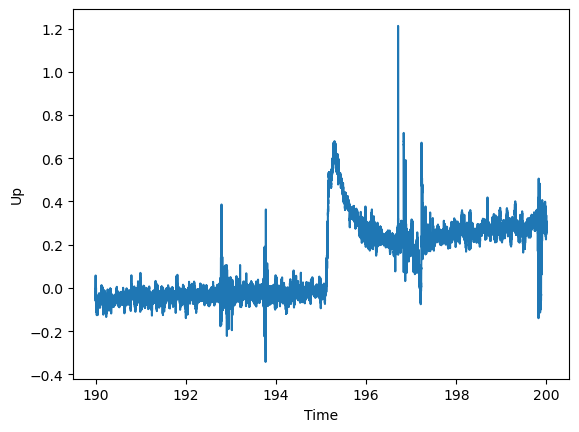

In [36]:
colnames = ['Time','East','North','Up','sigma_east','sigma_north','sigma_up']
data = pd.read_csv('sq11_YY_MM_DD_HR_MIN_SEC.txt', sep=" ", names=colnames, header=None)
#data['datetime']=  pd.to_datetime(
#                      data['Time'], unit='D', origin=pd.Timestamp('2021-12-31')
#                      )

data = data.set_index('Time')
data = data.to_xarray()
data.Up.plot(x='Time')

In [37]:
ds_11['doy_decimal'] = ds_11.time.dt.dayofyear + (ds_11.time.dt.hour / 24) + (ds_11.time.dt.minute / 1440) + (ds_11.time.dt.second / 86400)


In [38]:
ds_11_drain = ds_11.isel(time=range(4200,5200))


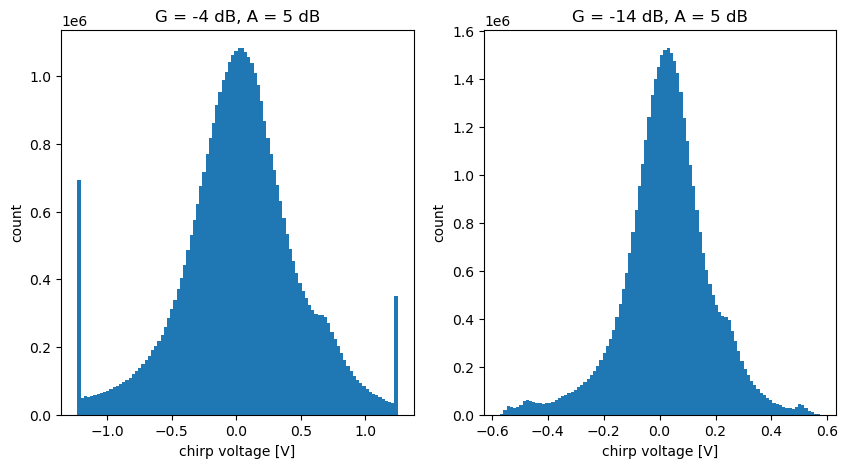

In [39]:
plot_hist(ds_11_drain)

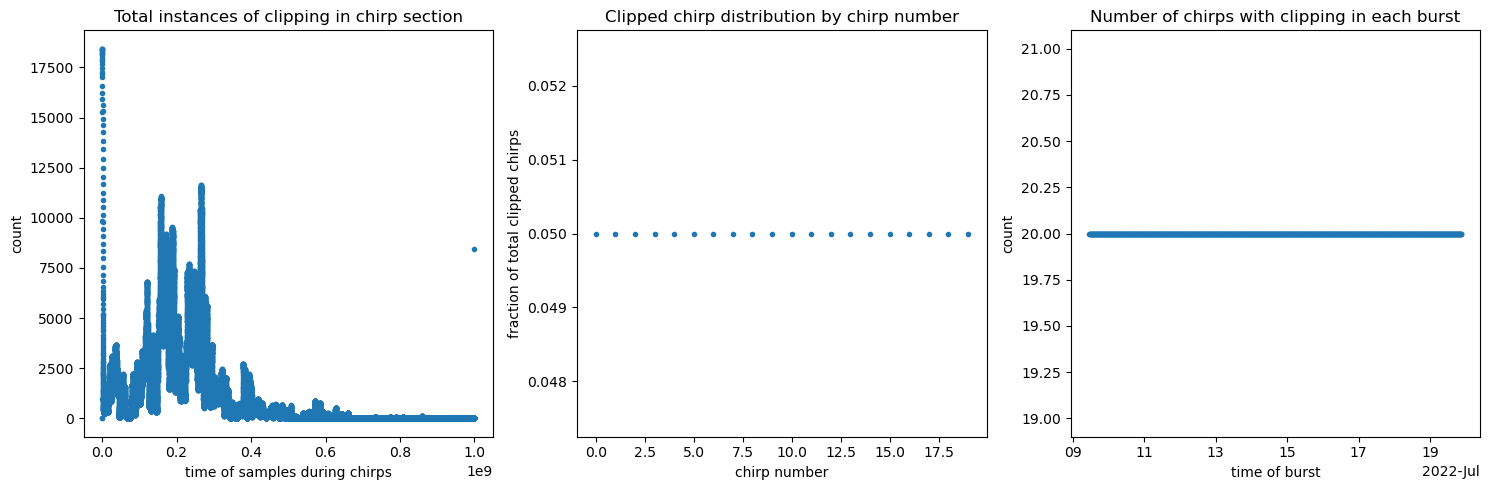

In [40]:
bad_chirp_condition = abs(ds_11_drain.isel(attenuator_setting_pair=0).chirp) > 1

plot_bad_chirp_count(ds_11_drain.isel(attenuator_setting_pair=0).chirp.where(bad_chirp_condition))

Looks like majority of clipping happens in the first 70% of the chirp. With first half (same setting as for the full season, we get this.

In [41]:
test = custom_profile(ds_11_drain.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=20000)

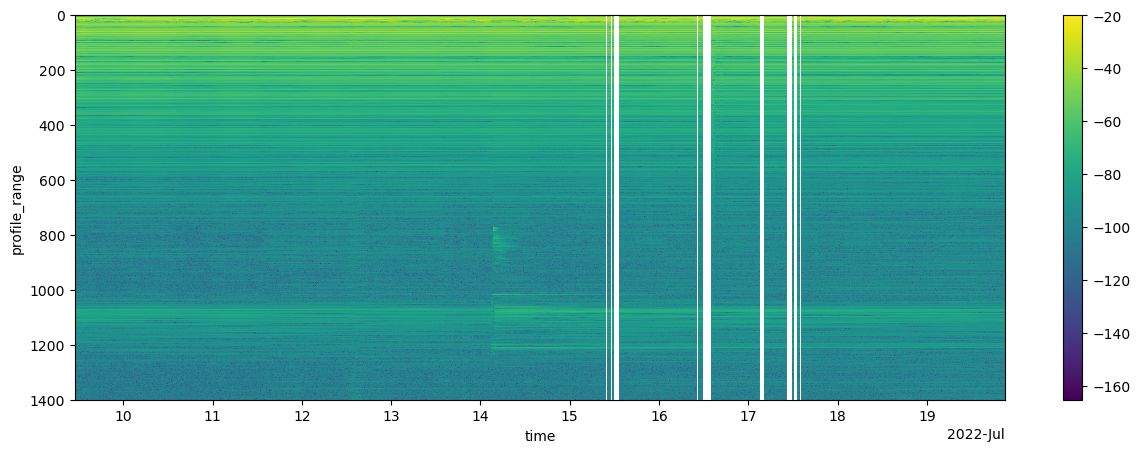

In [42]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

First 70% discarded yields:


In [43]:
test = custom_profile(ds_11_drain.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=28000)
test['doy_decimal'] = test.time.dt.dayofyear + (test.time.dt.hour / 24) + (test.time.dt.minute / 1440) + (test.time.dt.second / 86400)


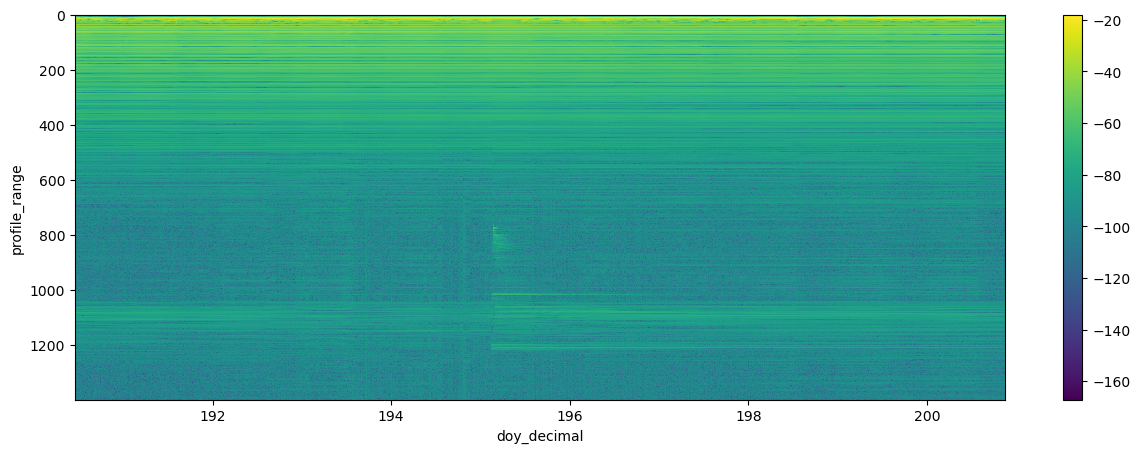

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='doy_decimal')
ax.invert_yaxis()

To preserve the temporal resolution of this timeseries, we accept poorer spatial resolution (70cm)

In [45]:
test.profile_range

<xarray.DataArray 'profile_range' (profile_range: 1997)> Size: 16kB
array([0.000000e+00, 7.010820e-01, 1.402164e+00, ..., 1.397958e+03,
       1.398659e+03, 1.399360e+03])
Coordinates:
  * profile_range  (profile_range) float64 16kB 0.0 0.7011 ... 1.399e+03

## A13

Let's load in the GPS data

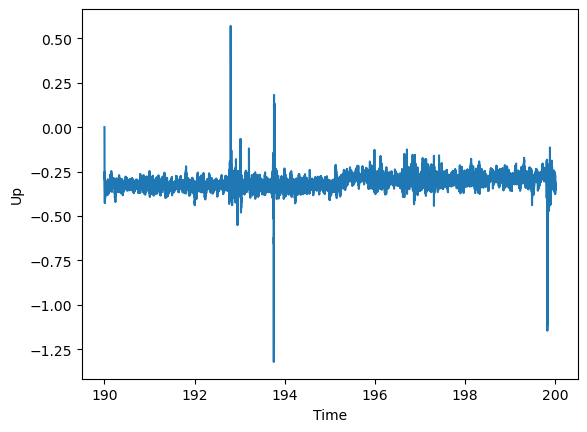

In [33]:
colnames = ['Time','East','North','Up','sigma_east','sigma_north','sigma_up']
data = pd.read_csv('sq13_YY_MM_DD_HR_MIN_SEC.txt', sep=" ", names=colnames, header=None)
#data['datetime']=  pd.to_datetime(
#                      data['Time'], unit='D', origin=pd.Timestamp('2021-12-31')
#                      )

data = data.set_index('Time')
data = data.to_xarray()
data.Up.plot(x='Time')

In [46]:
ds_13['doy_decimal'] = ds_13.time.dt.dayofyear + (ds_13.time.dt.hour / 24) + (ds_13.time.dt.minute / 1440) + (ds_13.time.dt.second / 86400)


In [52]:
ds_13_drain = ds_13.isel(time=range(4200,5200))


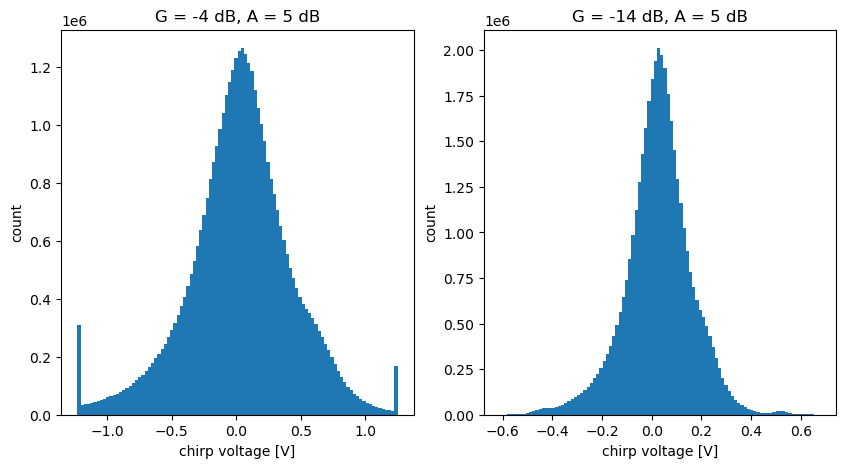

In [53]:
plot_hist(ds_13_drain)

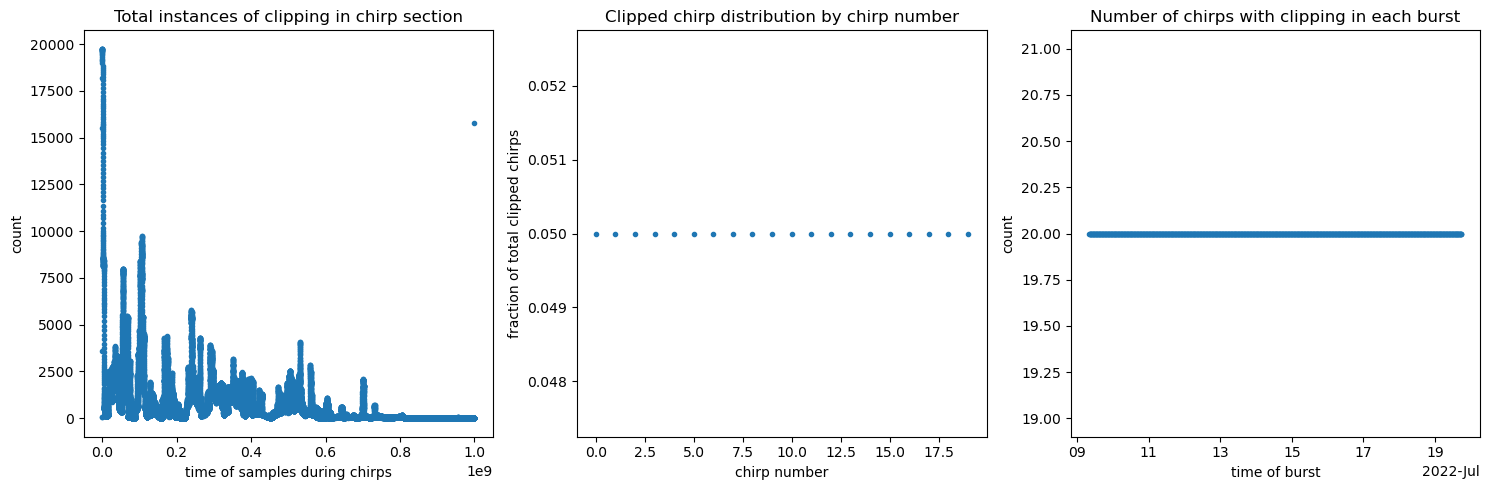

In [54]:
bad_chirp_condition = abs(ds_13_drain.isel(attenuator_setting_pair=0).chirp) > 1

plot_bad_chirp_count(ds_13_drain.isel(attenuator_setting_pair=0).chirp.where(bad_chirp_condition))

Looks like majority of clipping happens in the first 75% of the chirp. 

In [56]:
test = custom_profile(ds_13_drain.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=30000)

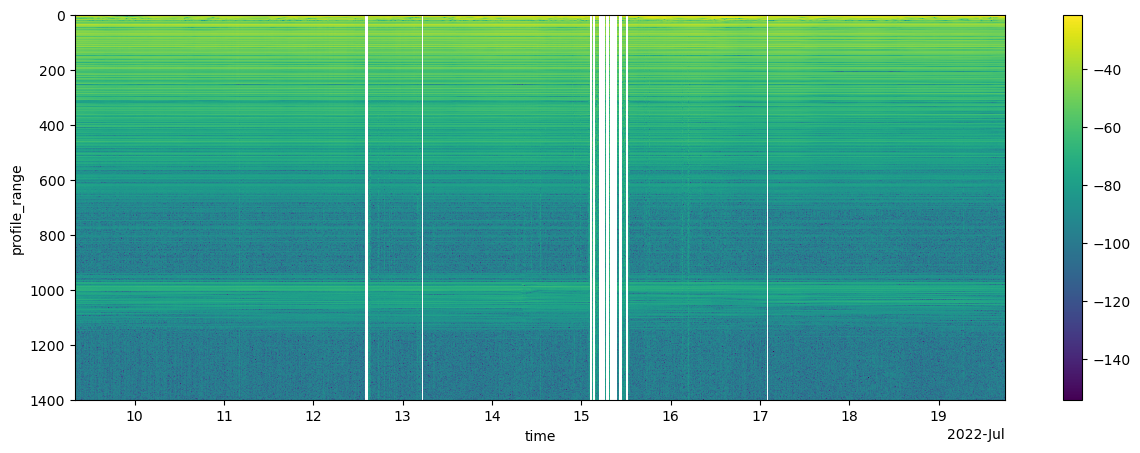

In [57]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

The spatial resolution is 84 cm. Unfortunately there are still gaps during this window

In [1]:
test.profile_range

NameError: name 'test' is not defined

## A14

Let's load in the GPS data

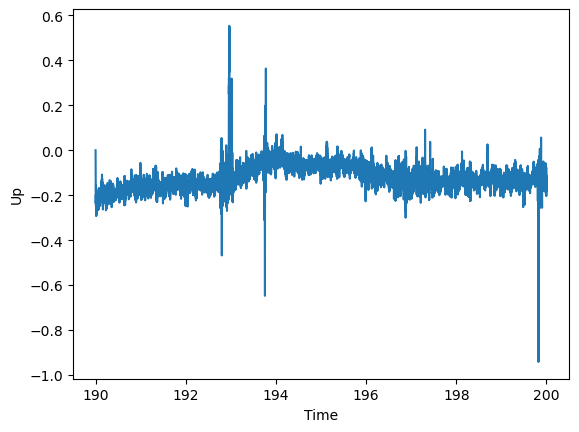

In [5]:
colnames = ['Time','East','North','Up','sigma_east','sigma_north','sigma_up']
data = pd.read_csv('sq14_YY_MM_DD_HR_MIN_SEC.txt', sep=" ", names=colnames, header=None)
#data['datetime']=  pd.to_datetime(
#                      data['Time'], unit='D', origin=pd.Timestamp('2021-12-31')
#                      )

data = data.set_index('Time')
data = data.to_xarray()
data.Up.plot(x='Time')

In [6]:
ds_14['doy_decimal'] = ds_14.time.dt.dayofyear + (ds_14.time.dt.hour / 24) + (ds_14.time.dt.minute / 1440) + (ds_14.time.dt.second / 86400)


In [7]:
ds_14_drain = ds_14.isel(time=range(4200,5200))


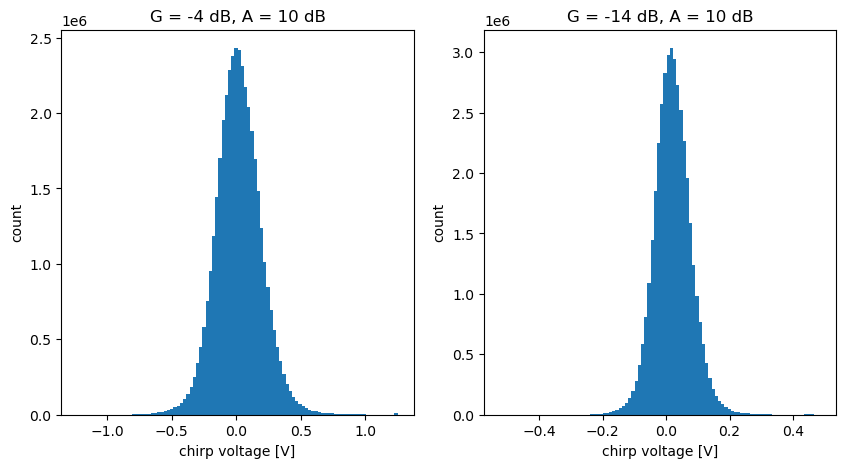

In [8]:
plot_hist(ds_14_drain)

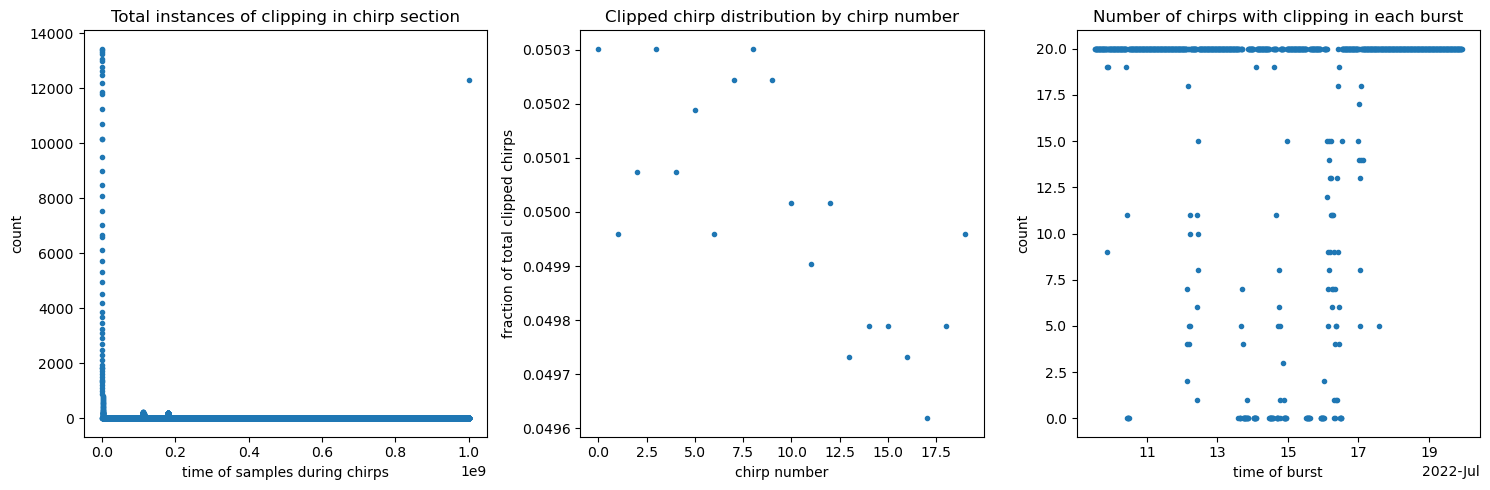

In [13]:
bad_chirp_condition = abs(ds_14_drain.isel(attenuator_setting_pair=0).chirp) > 1

plot_bad_chirp_count(ds_14_drain.isel(attenuator_setting_pair=0).chirp.where(bad_chirp_condition))

Looks like any clipping happens at the immediate start the chirp. We will use the same cutoff as

In [14]:
test = custom_profile(ds_14_drain.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=4000)

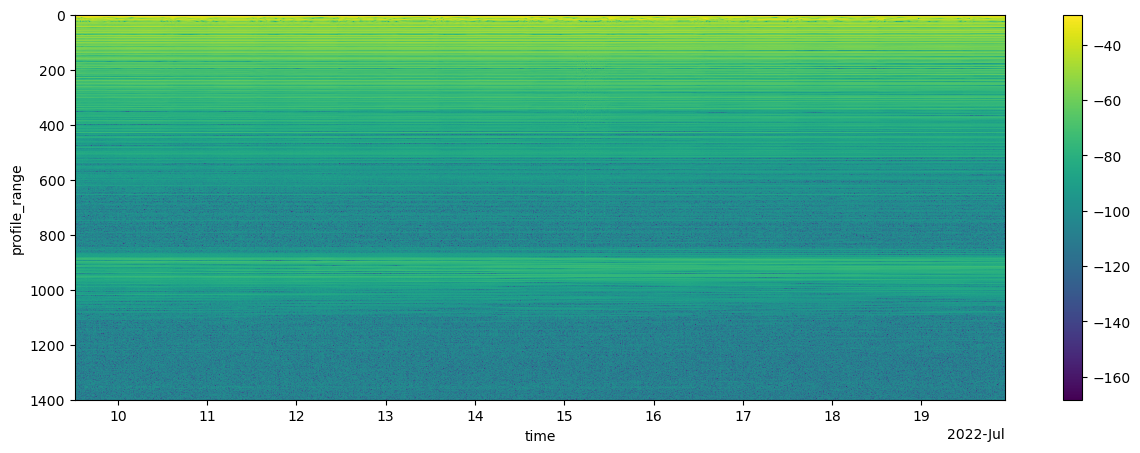

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

The spatial resolution is about 23 cm. 

In [16]:
test.profile_range

<xarray.DataArray 'profile_range' (profile_range: 5992)> Size: 48kB
array([0.000000e+00, 2.336680e-01, 4.673361e-01, ..., 1.399438e+03,
       1.399672e+03, 1.399905e+03])
Coordinates:
  * profile_range  (profile_range) float64 48kB 0.0 0.2337 ... 1.4e+03 1.4e+03